In [1]:
from openff.toolkit import Molecule

from openff.pdbscan.pdb import CCD_RESIDUE_DEFINITION_CACHE, topology_from_pdb
from utils import draw_molecule

%load_ext snakeviz

In [2]:
CCD_RESIDUE_DEFINITION_CACHE

CcdCache(path=/home/joshmitchell/Documents/openff/openff-pdbscan/.ccd_cache, preload=['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL', 'CL', 'NME', 'ACE', 'HOH', 'NA'], patches={'*': <function disambiguate_alt_ids at 0x7792b8ac2c00>, 'ACE': <function fix_caps at 0x7792b9515ee0>, 'NME': <function combine_patches.<locals>.<lambda> at 0x7792b8ac2d40>, 'NA': <function add_synonyms at 0x7792b8ac2b60>, 'CL': <function add_synonyms at 0x7792b8ac2b60>})

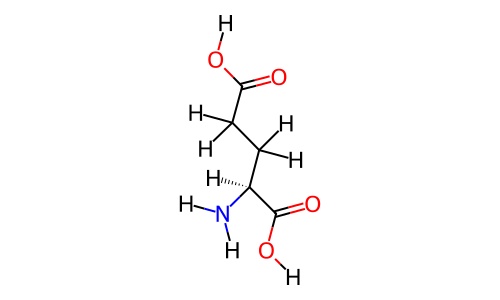

In [3]:
Molecule.from_smiles(
    "[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C@@]([H])([C](=[O])[O][H])[N]([H])[H]"
)

In [7]:
# %%snakeviz
# top = topology_from_pdb("/home/joshmitchell/Downloads/2p41.pdb")
top = topology_from_pdb(
    "5ap1_prepared.pdb",
    unknown_molecules=[
        Molecule.from_smiles(
            "O=C([O-])Cn1cc(cn1)c2ccc(cc2OCC#N)Nc3ccc(c(n3)NC4CCCCC4)C#N"
        )
    ],
)

In [5]:
w = top.visualize()
w.add_representation(
    "line",
    # sele="not hydrogen",
)
w

NGLWidget()

In [42]:
top.n_atoms

53520

In [22]:
w = top.visualize()
w.clear_representations()
w.add_licorice(selection="HIS")
w

NGLWidget()

In [5]:
from pathlib import Path

from openff.pdbscan.pdb._pdb_data import PdbData

data = PdbData.parse_pdb(Path("5ap1_prepared.pdb").read_text().splitlines())

In [6]:
top.molecule(129).visualize(backend="nglview")

NGLWidget()

In [8]:
from openff.toolkit import Topology

old_top = Topology.from_pdb(
    "5ap1_prepared.pdb",
    unique_molecules=[
        Molecule.from_smiles(
            "O=C([O-])Cn1cc(cn1)c2ccc(cc2OCC#N)Nc3ccc(c(n3)NC4CCCCC4)C#N"
        )
    ],
)

In [39]:
for new, old in zip(list(top.molecules)[1:], list(old_top.molecules)[1:]):
    assert new.is_isomorphic_with(old)

In [41]:
for new, old in zip(top.molecules, old_top.molecules):
    assert new.n_atoms == old.n_atoms
    for new_atom, old_atom in zip(new.atoms, old.atoms):
        new_atom_bits = (new_atom.symbol, new_atom.formal_charge, new_atom.name)
        old_atom_bits = (old_atom.symbol, old_atom.formal_charge, old_atom.name)
        if new_atom_bits != old_atom_bits:
            print(new_atom.metadata["residue_name"], new_atom_bits, old_atom_bits)

    new_bonds = {tuple(sorted([bond.atom1_index, bond.atom2_index])): bond for bond in new.bonds}
    old_bonds = {tuple(sorted([bond.atom1_index, bond.atom2_index])): bond for bond in old.bonds}

    assert set(new_bonds.keys()) == set(old_bonds.keys())
    
    for new_bond in new.bonds:
        old_bond = old_bonds[tuple(sorted([new_bond.atom1_index, new_bond.atom2_index]))]
        if new_bond.bond_order != old_bond.bond_order:
            print(
                new_bond.atom1.metadata["residue_name"],
                new_bond.atom1.metadata["chain_id"],
                new_bond.atom1.metadata["res_seq"],
                new_bond.atom2.metadata["residue_name"],
                new_bond.atom2.metadata["chain_id"],
                new_bond.atom2.metadata["res_seq"],
                new_bond,
                new_bond.bond_order,
                old_bond.bond_order,
            )

HIS ('N', <Quantity(1, 'elementary_charge')>, 'ND1') ('N', <Quantity(0, 'elementary_charge')>, 'ND1')
HIS ('N', <Quantity(-1, 'elementary_charge')>, 'NE2') ('N', <Quantity(0, 'elementary_charge')>, 'NE2')
HIS ('N', <Quantity(1, 'elementary_charge')>, 'ND1') ('N', <Quantity(0, 'elementary_charge')>, 'ND1')
HIS ('N', <Quantity(-1, 'elementary_charge')>, 'NE2') ('N', <Quantity(0, 'elementary_charge')>, 'NE2')
HIS ('N', <Quantity(1, 'elementary_charge')>, 'ND1') ('N', <Quantity(0, 'elementary_charge')>, 'ND1')
HIS ('N', <Quantity(-1, 'elementary_charge')>, 'NE2') ('N', <Quantity(0, 'elementary_charge')>, 'NE2')
HIS ('N', <Quantity(1, 'elementary_charge')>, 'ND1') ('N', <Quantity(0, 'elementary_charge')>, 'ND1')
HIS ('N', <Quantity(-1, 'elementary_charge')>, 'NE2') ('N', <Quantity(0, 'elementary_charge')>, 'NE2')
PHE A 2 PHE A 2 <Bond atom1 index='15', atom2 index='16'> 2 1
PHE A 2 PHE A 2 <Bond atom1 index='15', atom2 index='24'> 1 2
PHE A 2 PHE A 2 <Bond atom1 index='16', atom2 index='18'

In [40]:
assert top.molecule(0).is_isomorphic_with(old_top.molecule(0))

KeyboardInterrupt: 